In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.06']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
955,Afghanistan,22.10.06,199994
1922,Africa,22.10.06,12361686
2877,Albania,22.10.06,332410
3832,Algeria,22.10.06,270697
4781,Andorra,22.10.06,46275
...,...,...,...
218146,Wallis and Futuna,22.10.06,761
219136,World,22.10.06,620391360
220046,Yemen,22.10.06,11939
220979,Zambia,22.10.06,333555


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
955,Afghanistan,22.10.06,199994
2877,Albania,22.10.06,332410
3832,Algeria,22.10.06,270697
4781,Andorra,22.10.06,46275
5712,Angola,22.10.06,103131
...,...,...,...
217428,Vietnam,22.10.06,11484659
218146,Wallis and Futuna,22.10.06,761
220046,Yemen,22.10.06,11939
220979,Zambia,22.10.06,333555


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
210181,United States,22.10.06,96612478
92040,India,22.10.06,44606460
70729,France,22.10.06,35767474
28492,Brazil,22.10.06,34707233
75476,Germany,22.10.06,33826367
186255,South Korea,22.10.06,24933756
209192,United Kingdom,22.10.06,23735277
99701,Italy,22.10.06,22692912
101630,Japan,22.10.06,21488519
165590,Russia,22.10.06,20839504


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
203346,Turkey,22.10.06,16873793
188149,Spain,22.10.06,13431098
151516,Oceania,22.10.06,12449475
217428,Vietnam,22.10.06,11484659
12472,Australia,22.10.06,10275165
...,...,...,...
218146,Wallis and Futuna,22.10.06,761
93962,International,22.10.06,721
215503,Vatican,22.10.06,29
205351,Tuvalu,22.10.06,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.06', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_15304\758498795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.06', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.06,96612478
India,22.10.06,44606460
France,22.10.06,35767474
Brazil,22.10.06,34707233
Germany,22.10.06,33826367
South Korea,22.10.06,24933756
United Kingdom,22.10.06,23735277
Italy,22.10.06,22692912
Japan,22.10.06,21488519


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.06,96612478
1,India,22.10.06,44606460
2,France,22.10.06,35767474
3,Brazil,22.10.06,34707233
4,Germany,22.10.06,33826367
5,South Korea,22.10.06,24933756
6,United Kingdom,22.10.06,23735277
7,Italy,22.10.06,22692912
8,Japan,22.10.06,21488519
9,Russia,22.10.06,20839504


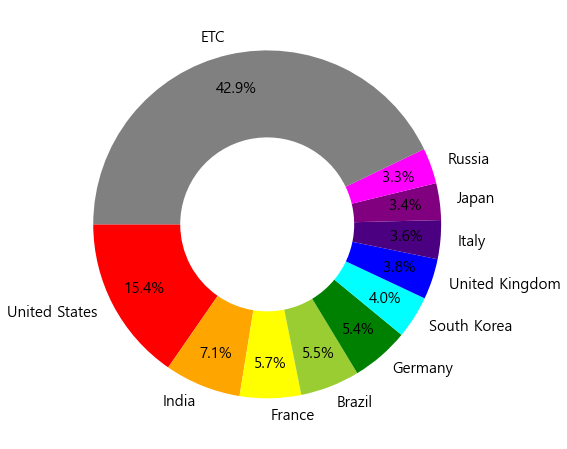

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()